In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from scipy import optimize

import mnist_reader

X_train, y_train = mnist_reader.load_mnist('data/mnist', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/mnist', kind='t10k')

n = 2000
#np.random.seed(6333)
#ids = np.random.choice(range(60000),n)
#X_train, y_train = X_train[ids], y_train[ids]

n = X_train.shape[0]


X_train = X_train.astype(np.float32)
max_val = np.max(X_train)
X_train = X_train/max_val

X_test = X_test.astype(np.float32) / max_val

classes = [
    '0',
    '1',
    '2',
    '3',
    '4',
    '5',
    '6',
    '7',
    '8',
    '9']

print(y_train)
print('Max Value Before Normalization: ', max_val)
print(X_train.shape, y_train.shape)

from scipy.io import savemat

d = {}
d['X_train'] = X_train
d['y_train'] = y_train
d['X_test'] = X_test
d['y_test'] = y_test

savemat('Parametric_tSNE/mnist/data.mat',d)
    
%matplotlib inline

%load_ext autoreload
%autoreload 2

[5 0 4 ... 5 6 8]
Max Value Before Normalization:  255.0
(60000, 784) (60000,)


In [2]:
def fig_plot(X,y,filename):
    plt.figure(figsize=[6,5])
    plt.scatter(X[:,0], X[:,1], c=y, s=0.1, cmap='Spectral')
    
    plt.xticks([],[])
    plt.yticks([],[])
    
    plt.savefig('MNIST_FIGURES_Jan_30_2023/'+filename, bbox_inches='tight')

    return

(-0.5, 27.5, 27.5, -0.5)

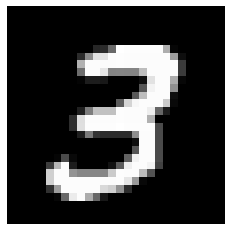

In [3]:
img = X_train[7,:].reshape(28,28)
x_img = np.zeros((28,28,3))
x_img[:,:,0] = img
x_img[:,:,1] = img
x_img[:,:,2] = img

plt.figure()
plt.imshow(x_img)
plt.axis('off')

<h1>PCA</h1>

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

y_pca = pca.fit_transform(X_train)
y_pca_test = pca.transform(X_test)



from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(y_pca, y_train)

y_nene_out = neigh.predict(y_pca_test)

err_pca = 1-np.mean(y_nene_out==y_test)

print('1-NN Error:', err_pca)

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(y_pca, y_train)

y_nene_out = neigh.predict(y_pca_test)

err_pca_5 = 1-np.mean(y_nene_out==y_test)

print('5-NN Error:', err_pca_5)

1-NN Error: 0.6104
5-NN Error: 0.5752999999999999


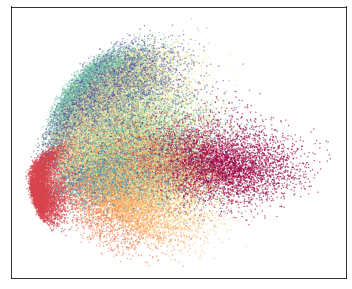

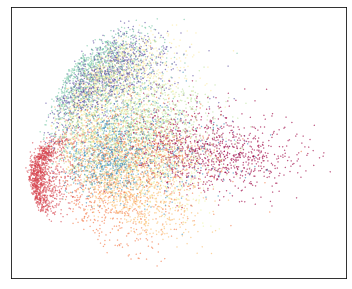

In [5]:
fig_plot(y_pca, y_train, 'mnist_PCA.png')

fig_plot(y_pca_test, y_test, 'mnist_PCA_test.png')

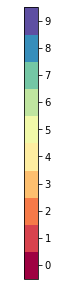

In [6]:
#Create the Colorbar

import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=[6,5])

fraction = 1  # .05

values = np.arange(10)

norm = mpl.colors.Normalize(vmin=values[0], vmax=values[-1])
cbar = ax.figure.colorbar(
            mpl.cm.ScalarMappable(norm=norm, cmap='Spectral'),
            boundaries=np.arange(11)-0.5,
            ax=ax, fraction=fraction)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)

ax.margins(0,0)

ax.axis('off')
plt.show()

fig.savefig('MNIST_FIGURES/mnist_train_colorbar.png', bbox_inches='tight')

<h1>UMAP</h1>

In [7]:
import umap

print(umap.__version__)

0.4.6


In [8]:
import umap

np.random.seed(100)
ump = umap.UMAP(n_neighbors=30,
        min_dist=0.25,
        n_components=2,
        random_state=100,
        metric= 'euclidean')

y_umap = ump.fit_transform(X_train)

y_umap_test = ump.transform(X_test)



/home/ponir/.local/lib/python3.6/site-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


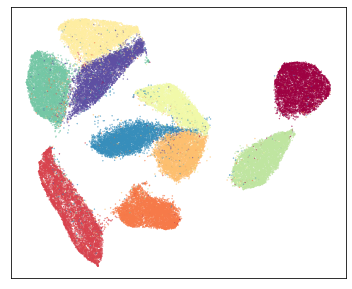

In [9]:
fig_plot(y_umap,y_train,'mnist_UMAP.png')

In [10]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(y_umap, y_train)

y_nene_out = neigh.predict(y_umap_test)

err_umap = 1-np.mean(y_nene_out==y_test)

print('1-NN Error: ', err_umap)


neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(y_umap, y_train)

y_nene_out = neigh.predict(y_umap_test)

err_umap_5 = 1-np.mean(y_nene_out==y_test)

print('5-NN Error: ', err_umap_5)

1-NN Error:  0.07410000000000005
5-NN Error:  0.0474


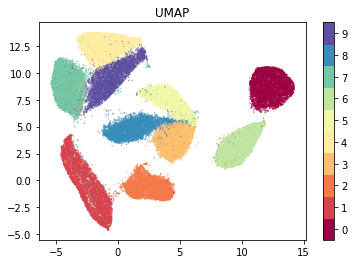

In [11]:
plt.figure()
plt.title('UMAP')
plt.scatter(y_umap[:,0], y_umap[:,1], c=y_train, s=0.1, cmap='Spectral')

cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)

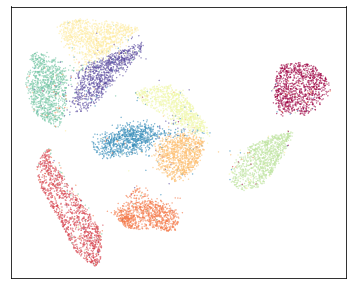

In [12]:
fig_plot(y_umap_test,y_test,'mnist_UMAP_Test.png')

(-4.5, 5.0)

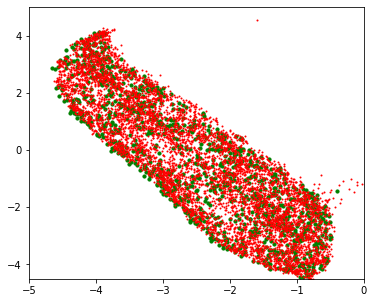

In [17]:
y_ump1_tr = y_umap[y_train==1]
y_ump1_te = y_umap_test[y_test==1]

plt.figure(figsize=[6,5])
plt.scatter(y_ump1_te[:,0], y_ump1_te[:,1], c='g', s=10)
plt.scatter(y_ump1_tr[:,0], y_ump1_tr[:,1], c='r', s=1)


plt.xlim([-5,0])
plt.ylim([-4.5,5])

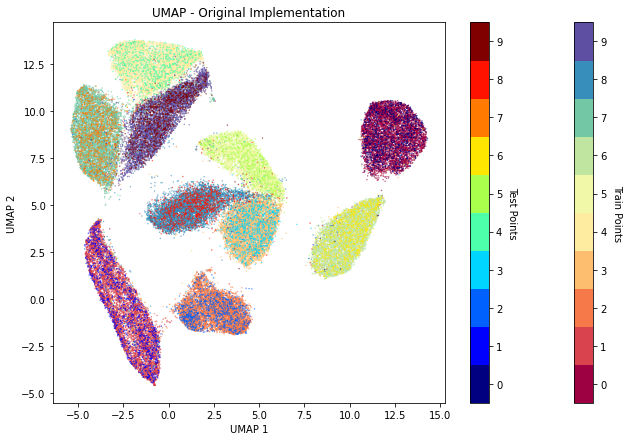

In [13]:
plt.figure(figsize=(11,7))#
plt.scatter(y_umap[:,0], y_umap[:,1], c=y_train, s=0.1, cmap='Spectral')
plt.title("UMAP - Original Implementation")
plt.xlabel("UMAP 1") #, fontsize = 20); 
plt.ylabel("UMAP 2") #, fontsize = 20)
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Train Points', rotation=270)
plt.scatter(y_umap_test[:,0], y_umap_test[:,1], c = y_test.astype(int), cmap = 'jet', s = 0.1)
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Test Points', rotation=270)
plt.show()
plt.show()

<h2>trying negative sample rate 3</h2>

In [14]:
ump.negative_sample_rate = 3
#numpy.np.seed(100)
y_test_ns_3 = ump.transform(X_test)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(y_umap, y_train)

y_nene_out = neigh.predict(y_test_ns_3)

err_umap = 1-np.mean(y_nene_out==y_test)

print('1-NN Error: ', err_umap)


neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(y_umap, y_train)

y_nene_out = neigh.predict(y_test_ns_3)

err_umap_5 = 1-np.mean(y_nene_out==y_test)

print('5-NN Error: ', err_umap_5)

1-NN Error:  0.07410000000000005
5-NN Error:  0.04800000000000004


(-4.5, 5.0)

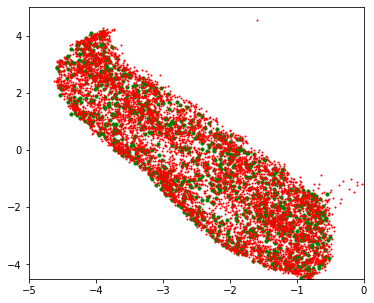

In [16]:
y_ump1_tr = y_umap[y_train==1]
y_ump1_te = y_test_ns_3[y_test==1]

plt.figure(figsize=[6,5])
plt.scatter(y_ump1_te[:,0], y_ump1_te[:,1], c='g', s=10)
plt.scatter(y_ump1_tr[:,0], y_ump1_tr[:,1], c='r', s=1)


plt.xlim([-5,0])
plt.ylim([-4.5,5])

<h1>UMAP ns=1</h1>

In [18]:
ump.negative_sample_rate = 1
#numpy.np.seed(100)
y_test_ns_1 = ump.transform(X_test)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(y_umap, y_train)

y_nene_out = neigh.predict(y_test_ns_1)

err_umap = 1-np.mean(y_nene_out==y_test)

print('1-NN Error: ', err_umap)


neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(y_umap, y_train)

y_nene_out = neigh.predict(y_test_ns_1)

err_umap_5 = 1-np.mean(y_nene_out==y_test)

print('5-NN Error: ', err_umap_5)

1-NN Error:  0.07130000000000003
5-NN Error:  0.0474


(-4.5, 5.0)

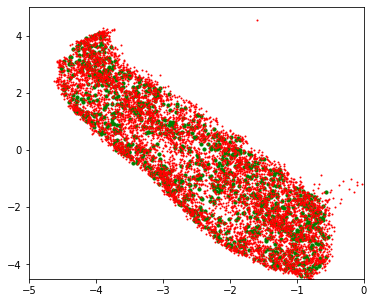

In [20]:
y_ump1_tr = y_umap[y_train==1]
y_ump1_te = y_test_ns_1[y_test==1]

plt.figure(figsize=[6,5])
plt.scatter(y_ump1_te[:,0], y_ump1_te[:,1], c='g', s=10)
plt.scatter(y_ump1_tr[:,0], y_ump1_tr[:,1], c='r', s=1)


plt.xlim([-5,0])
plt.ylim([-4.5,5])

<h1>15 neighbors</h1>

In [21]:
#UMAP K=15

import umap

ump_15 = umap.UMAP(n_neighbors=15,
        min_dist=0.25,
        n_components=2,
        random_state=100,
        metric= 'euclidean')

y_umap_15 = ump_15.fit_transform(X_train)

y_umap_test_15 = ump_15.transform(X_test)

y_umap_15_all = np.concatenate((y_umap_15,y_umap_test_15))

([], [])

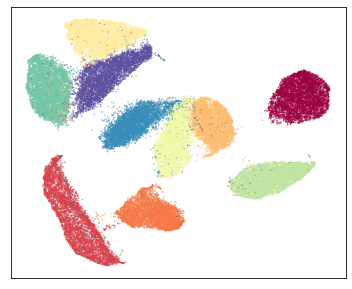

In [22]:
plt.figure(figsize=[6,5])
plt.scatter(y_umap_15[:,0], y_umap_15[:,1], c=y_train, s=0.1, cmap='Spectral')

plt.xticks([],[])
plt.yticks([],[])

(-5.0, 5.0)

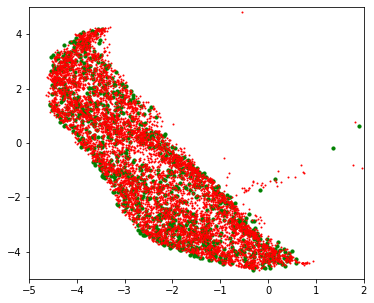

In [23]:
y_ump1_tr_15 = y_umap_15[y_train==1]
y_ump1_te_15 = y_umap_test_15[y_test==1]

plt.figure(figsize=[6,5])
plt.scatter(y_ump1_te_15[:,0], y_ump1_te_15[:,1], c='g', s=10)
plt.scatter(y_ump1_tr_15[:,0], y_ump1_tr_15[:,1], c='r', s=1)


plt.xlim([-5,2])
plt.ylim([-5,5])

<h1>UMAP with both test and train data</h1>

In [24]:
X_all = np.concatenate((X_train,X_test))
y_all = np.concatenate((y_train,y_test))

from sklearn.metrics.pairwise import euclidean_distances

dist_X = euclidean_distances(X_all) #explicitely computing distance matrix

In [25]:
np.random.seed(100)
ump_all = umap.UMAP(n_neighbors=30,
        min_dist=0.25,
        n_components=2,
        random_state=100,
        n_epochs=60*40,
        metric= 'precomputed')

y_ump_all = ump_all.fit_transform(dist_X)
y_ump_all_orig = y_ump_all.copy()

y_ump_all_tr = y_ump_all[X_train.shape[0]:]
y_ump_all_te = y_ump_all[:X_train.shape[0]]

/home/ponir/.local/lib/python3.6/site-packages/umap/umap_.py:1504: UserWarning: using precomputed metric; transform will be unavailable for new data and inverse_transform will be unavailable for all data
  "using precomputed metric; transform will be unavailable for new data and inverse_transform "


In [26]:
y_ump_all_tr = y_ump_all[:X_train.shape[0]]
y_ump_all_te = y_ump_all[X_train.shape[0]:]

from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(y_ump_all_tr, y_train)

y_nene_out = neigh.predict(y_ump_all_te)

err_umap_all = 1-np.mean(y_nene_out==y_test)

print('1-NN Error: ', err_umap_all)


neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(y_ump_all_tr, y_train)

y_nene_out = neigh.predict(y_ump_all_te)

err_umap_all_5 = 1-np.mean(y_nene_out==y_test)

print('5-NN Error: ', err_umap_all_5)

1-NN Error:  0.06140000000000001
5-NN Error:  0.03649999999999998


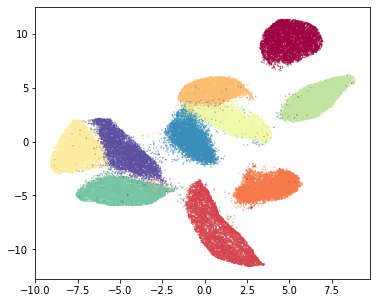

In [27]:
def rotate_data(Z,rot_angle):
    theta = (rot_angle) * np.pi / 180
    rot_mat = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    
    mn = np.mean(Z, axis=0)

    Y = Z - mn
    Y = rot_mat.dot(Y.T).T
    
    return Y


y_ump_all_2 = rotate_data(y_ump_all_orig,60)

y_ump_all = y_ump_all_2


plt.figure(figsize=[6,5])
plt.scatter(y_ump_all[:,0], y_ump_all[:,1], c=y_all, s=0.1, cmap='Spectral')

(6742, 2) (6742,)


(-4.5, 5.0)

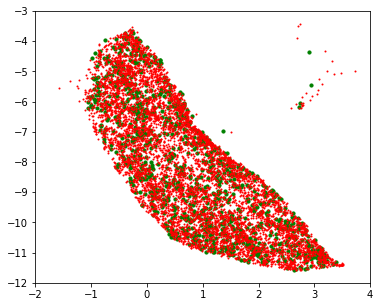

<Figure size 432x360 with 0 Axes>

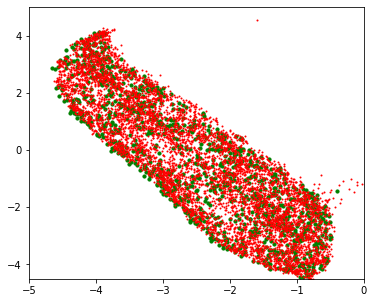

In [28]:
#comparing embedding of UMAP_ALL and UMAP(ns=5) - OOS

y_1_idx = y_train==1

y_ump_all1_tr = y_ump_all[:X_train.shape[0]][y_1_idx]
y_ump_all1_te = y_ump_all[X_train.shape[0]:][y_test==1]


y_1 = y_train[y_1_idx]

print(y_ump_all1_tr.shape, y_1.shape)

plt.figure(figsize=[6,5])

plt.scatter(y_ump_all1_te[:,0], y_ump_all1_te[:,1], c='g', s=10)
plt.scatter(y_ump_all1_tr[:,0], y_ump_all1_tr[:,1], c='r', s=1)

plt.xlim([-2,4.0])
plt.ylim([-12,-3])

plt.figure(figsize=[6,5])


y_ump1_tr = y_umap[y_train==1]
y_ump1_te = y_umap_test[y_test==1]

plt.figure(figsize=[6,5])

plt.scatter(y_ump1_te[:,0], y_ump1_te[:,1], c='g', s=10)
plt.scatter(y_ump1_tr[:,0], y_ump1_tr[:,1], c='r', s=1)

plt.xlim([-5,0])
plt.ylim([-4.5,5])

<h1> Torch Imports</h1>

In [29]:
import torch
from network_sig import network

device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

X_train32 = X_train.astype(np.float32)

print('Conversion Done')
X_torch = torch.as_tensor(X_train32, dtype=torch.float32).to(device)
X_test_torch = torch.as_tensor(X_test, dtype=torch.float32).to(device)
print('Tensor Build Done')


Conversion Done
Tensor Build Done


<h1> MSE </h1>

In [30]:
model2 = network(channels=[X_train.shape[1],500,300,200,100,100,100,2]).to(device)


In [32]:
model2.load_state_dict(torch.load('nets_MSE_UMAP_dim_2/epoch20.pth'))
model2.eval()

Y_MSE = []

with torch.no_grad():
    for i in range(n):
        if i%10000 == 0:
            print('completed ', i, ' of ', n)
            
        x_st = X_torch[i:i+1,:]
        y_st = model2(x_st).cpu().numpy().reshape(-1)
        Y_MSE.append(y_st)

Y_MSE = np.array(Y_MSE)
print(Y_MSE)

completed  0  of  60000
completed  10000  of  60000
completed  20000  of  60000
completed  30000  of  60000
completed  40000  of  60000
completed  50000  of  60000
[[ 4.2149296   7.090659  ]
 [12.794176    8.255289  ]
 [ 0.44268805 13.260996  ]
 ...
 [ 4.4733133   7.2610703 ]
 [ 9.851388    1.7893527 ]
 [-0.98004127  4.6406746 ]]


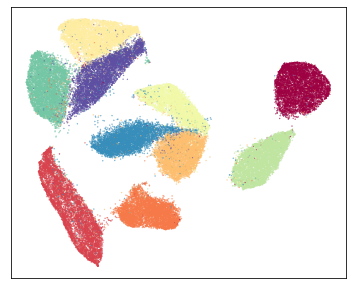

In [33]:
fig_plot(Y_MSE,y_train,'mnist_UMAP_MSE.png')

In [34]:
Y_test_MSE = []
n_test = X_test.shape[0]

with torch.no_grad():
    for i in range(n_test):
        if i%10000 == 0:
            print('completed ', i, ' of ', n_test)
            
        x_st = X_test_torch[i:i+1,:]
        y_st = model2(x_st).cpu().numpy().reshape(-1)
        Y_test_MSE.append(y_st)

Y_test_MSE = np.array(Y_test_MSE)


completed  0  of  10000


In [35]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(Y_MSE, y_train)

y_nene_out = neigh.predict(Y_test_MSE)

err_mse = 1-np.mean(y_nene_out==y_test)

print('1-NN Error: ', err_mse)

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(Y_MSE, y_train)

y_nene_out = neigh.predict(Y_test_MSE)

err_mse_5 = 1-np.mean(y_nene_out==y_test)

print('5-NN Error: ', err_mse_5)

1-NN Error:  0.10240000000000005
5-NN Error:  0.07230000000000003


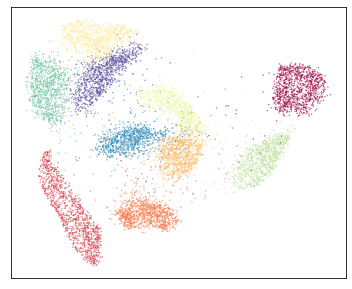

In [36]:
fig_plot(Y_test_MSE, y_test, 'mnist_UMAP_MSE_test.png')

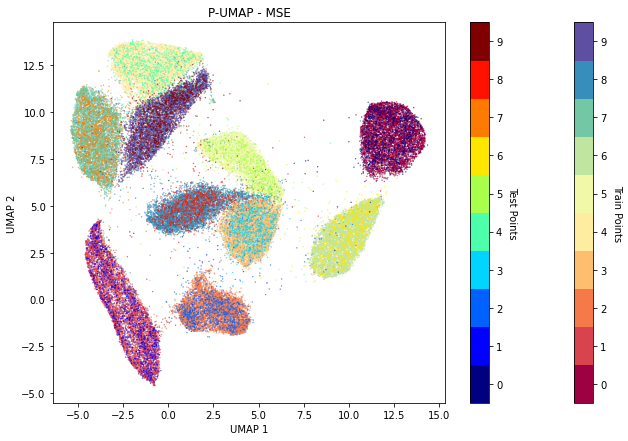

In [37]:
plt.figure(figsize=(11,7))#figsize=(20,15))
plt.scatter(Y_MSE[:,0], Y_MSE[:,1], c=y_train, s=0.1, cmap='Spectral')
plt.title("P-UMAP - MSE")
plt.xlabel("UMAP 1") #, fontsize = 20); 
plt.ylabel("UMAP 2") #, fontsize = 20)
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Train Points', rotation=270)
plt.scatter(Y_test_MSE[:,0], Y_test_MSE[:,1], c = y_test.astype(int), cmap = 'jet', s = 0.1)
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Test Points', rotation=270)
plt.show()
plt.show()

<h1> Cross Entropy + MSE </h1>

In [38]:
model3 = network(channels=[X_train.shape[1],500,300,200,100,100,100,2]).to(device)

In [39]:
model3.load_state_dict(torch.load('nets_MSE_CE_UMAP_dim_2/epoch19.pth'))
model3.eval()

Y_MSECE = []

with torch.no_grad():
    for i in range(n):
        if i%10000 == 0:
            print('completed ', i, ' of ', n)
            
        x_st = X_torch[i:i+1,:]
        y_st = model3(x_st).cpu().numpy().reshape(-1)
        Y_MSECE.append(y_st)

Y_MSECE = np.array(Y_MSECE)

completed  0  of  60000
completed  10000  of  60000
completed  20000  of  60000
completed  30000  of  60000
completed  40000  of  60000
completed  50000  of  60000


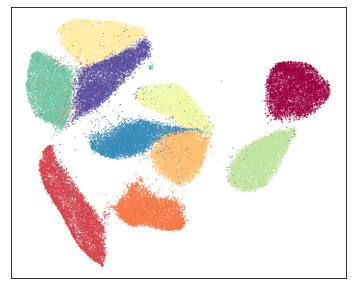

In [40]:
fig_plot(Y_MSECE, y_train, 'mnist_UMAP_CEMSE.png')

completed  0  of  60000


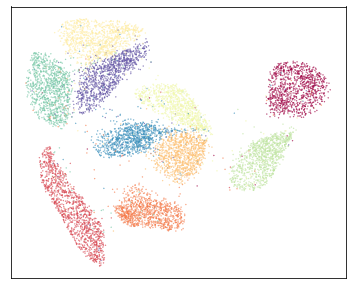

In [42]:
Y_test_MSECE = []
n_test = X_test.shape[0]

with torch.no_grad():
    for i in range(n_test):
        if i%10000 == 0:
            print('completed ', i, ' of ', n)
            
        x_st = X_test_torch[i:i+1,:]
        #print(x_st.size())
        y_st = model3(x_st).cpu().numpy().reshape(-1)
        #print(y_st.shape)
        Y_test_MSECE.append(y_st)

Y_test_MSECE = np.array(Y_test_MSECE)

fig_plot(Y_test_MSECE, y_test, 'mnist_UMAP_CEMSE_test.png')

In [43]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(Y_MSECE, y_train)

y_nene_out = neigh.predict(Y_test_MSECE)

err_cemse = 1-np.mean(y_nene_out==y_test)

print('1-NN Error:', err_cemse)

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(Y_MSECE, y_train)

y_nene_out = neigh.predict(Y_test_MSECE)

err_cemse_5 = 1-np.mean(y_nene_out==y_test)

print('5-NN Error:', err_cemse_5)

1-NN Error: 0.06669999999999998
5-NN Error: 0.04190000000000005


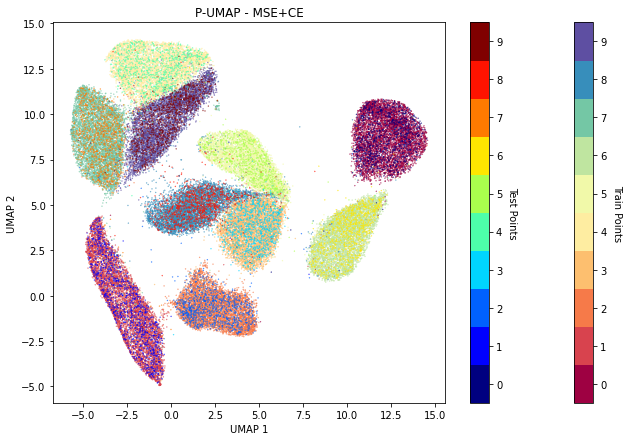

In [44]:
plt.figure(figsize=(11,7))#figsize=(20,15))
plt.scatter(Y_MSECE[:,0], Y_MSECE[:,1], c=y_train, s=0.1, cmap='Spectral')
plt.title("P-UMAP - MSE+CE")
plt.xlabel("UMAP 1") #, fontsize = 20); 
plt.ylabel("UMAP 2") #, fontsize = 20)
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Train Points', rotation=270)
plt.scatter(Y_test_MSECE[:,0], Y_test_MSECE[:,1], c = y_test.astype(int), cmap = 'jet', s = 0.1)
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Test Points', rotation=270)
plt.show()
plt.show()

<h1> Cross Entropy </h1>

In [45]:
model = network(channels=[X_train.shape[1],500,300,200,100,100,100,2]).to(device)

In [46]:
model.load_state_dict(torch.load('nets_dim_2/epoch39.pth'))
model.eval()

Y = []

with torch.no_grad():
    for i in range(n):
        if i%10000 == 0:
            print('completed ', i, ' of ', n)
            
        x_st = X_torch[i:i+1,:]
        y_st = model(x_st).cpu().numpy().reshape(-1)
        Y.append(y_st)

Y = np.array(Y)
print(Y)



completed  0  of  60000
completed  10000  of  60000
completed  20000  of  60000
completed  30000  of  60000
completed  40000  of  60000
completed  50000  of  60000
[[-7.03552628e+00 -5.26198030e-01]
 [ 1.37130713e+00 -5.41981983e+00]
 [-1.73790665e+01  3.34099603e+00]
 ...
 [-6.54215240e+00  2.38227495e-03]
 [-1.68673348e+00  5.01073360e-01]
 [-1.20253105e+01 -4.82859945e+00]]


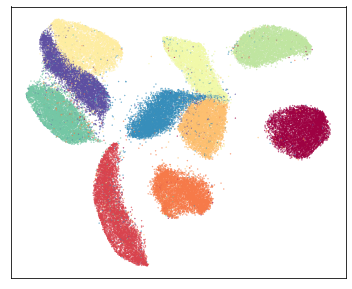

In [47]:
fig_plot(Y, y_train, 'mnist_UMAP_CE.png')

In [48]:
Y_test = []
n_test = X_test.shape[0]

with torch.no_grad():
    for i in range(n_test):
        if i%10000 == 0:
            print('completed ', i, ' of ', n)
            
        x_st = X_test_torch[i:i+1,:]
        y_st = model(x_st).cpu().numpy().reshape(-1)
        Y_test.append(y_st)

Y_test = np.array(Y_test)
print(Y)

completed  0  of  60000
[[-7.03552628e+00 -5.26198030e-01]
 [ 1.37130713e+00 -5.41981983e+00]
 [-1.73790665e+01  3.34099603e+00]
 ...
 [-6.54215240e+00  2.38227495e-03]
 [-1.68673348e+00  5.01073360e-01]
 [-1.20253105e+01 -4.82859945e+00]]


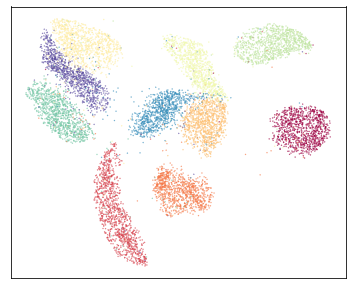

In [49]:
fig_plot(Y_test, y_test, 'mnist_UMAP_CE_test.png')

In [50]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(Y, y_train)

y_nene_out = neigh.predict(Y_test)

err_ce = 1-np.mean(y_nene_out==y_test)

print(err_ce)

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(Y, y_train)

y_nene_out = neigh.predict(Y_test)

err_ce_5 = 1-np.mean(y_nene_out==y_test)

print(err_ce_5)

0.08199999999999996
0.05020000000000002


<h1>Repulsion Effect</h1>

(60000, 2) (6742,)
(6970, 2)
No of Points Outside:  3 49 46


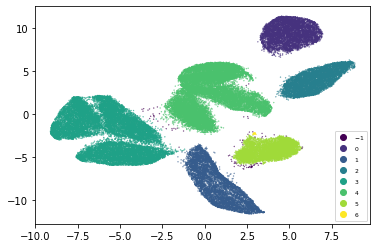

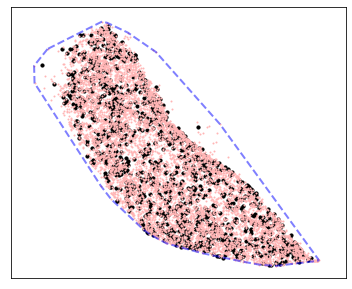

In [52]:
from scipy.spatial import ConvexHull
import hdbscan

test_label = 1

y_ump_all1_tr = y_ump_all[:X_train.shape[0]]#[y_train==test_label]
y_ump_all1_te = y_ump_all[X_train.shape[0]:]#[y_test==test_label]

c1 = 'k'#'r'
c2 = '#FFB5B5' #'#FF7070' #'#ABD190'#'blanchedalmond'

s1 = 10
s2 = 1

#y_1 = y_train[y_1_idx]

print(y_ump_all1_tr.shape, y_1.shape)


def choose_Y(Y_sub,x_lim,y_lim):
    
    Y_2 = []
    
    for i in range(len(Y_sub)):
        y_2 = Y_sub[i,:]
        if y_2[0]>=x_lim[0] and y_2[0]<=x_lim[1] and y_2[1]>=y_lim[0] and y_2[1]<=y_lim[1]:
            Y_2.append(y_2)
            
    Y_2 = np.array(Y_2)
    
    return Y_2

import cvxpy as cp

def is_inside(x,verts, verbose=False):
    n = len(verts)
    
    w = cp.Variable(n)
    
    problem = cp.Problem( cp.Minimize(cp.sum_squares(verts.T @ w - x)),
        [w>=0, cp.sum(w)==1]) 
    
    problem.solve(solver=cp.ECOS, verbose=verbose)
    
    w = w.value
    
    z = np.sum((verts.T @ w - x)**2)
    
    if z<10**-10:
        return 1
    else:
        return 0
    
def get_no_of_points_outside(X, vert_points, verbose=False):
    no_out = 0
    y_labels = []
    for i in range(len(X)):
        y_in = is_inside(X[i], vert_points, verbose=False)
        no_out += 1-y_in
        y_labels.append(y_in)
    return no_out

def verts_points_inside(vert_points, scale=0.95):
    mn = np.mean(vert_points, axis=0)
    
    verts_points_inside = []
    for i in range(len(vert_points)):
        unit = vert_points[i] - mn
        unit = mn + unit * scale
        verts_points_inside.append(unit)
        
    return np.array(verts_points_inside)

plt.figure()
clusterer = hdbscan.HDBSCAN(min_cluster_size=15, prediction_data = True)
cluster_labels = clusterer.fit_predict(y_ump_all1_tr)

scatter = plt.scatter(y_ump_all1_tr[:,0], y_ump_all1_tr[:,1], c=cluster_labels, s=0.1)
lgd = plt.legend(*scatter.legend_elements(),
                    loc="lower right",
                    fontsize=12,
                prop={'size': 6})


plt.figure(figsize=[6,5])

Y_sub =  y_ump_all1_tr[cluster_labels==1]
cluster_labels_te, _ = hdbscan.approximate_predict(clusterer, y_ump_all1_te)
Y_sub_te = y_ump_all1_te[cluster_labels_te==1]

plt.scatter(Y_sub_te[:,0], Y_sub_te[:,1], c=c1, s=s1)
plt.scatter(Y_sub[:,0], Y_sub[:,1], c=c2, s=s2)



 #choose_Y(y_ump_all1_tr[y_train==1],x_lim=[-10,-4],y_lim=[-10,0])

print(Y_sub.shape)

hull = ConvexHull(Y_sub)
verts = hull.vertices
vert_points = Y_sub[verts]
verts = np.append( verts, hull.vertices[0] )
plt.plot(Y_sub[verts,0], Y_sub[verts,1], 'b--', lw=2, alpha=0.5)

scaled_verts = verts_points_inside(vert_points)
scaled_verts_plot = np.append(scaled_verts, scaled_verts[0]).reshape(scaled_verts.shape[0]+1,-1)

plt.plot(scaled_verts_plot[0], scaled_verts_plot[1], 'k--', lw=2, alpha=0.5)


plt.xlim([-2,4.0])
plt.ylim([-12,-3])

plt.xticks([],[])
plt.yticks([],[])

n1 = get_no_of_points_outside(Y_sub_te, vert_points)
n2 = get_no_of_points_outside(Y_sub_te, scaled_verts)
print('No of Points Outside: ', n1, n2, n2-n1)    

DPI = 400

(24, 2) [-1.45233076 -5.15001558]


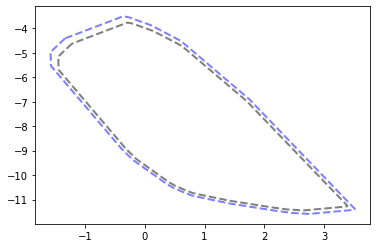

In [53]:
plt.figure()
plt.plot(Y_sub[verts,0], Y_sub[verts,1], 'b--', lw=2, alpha=0.5)

print(scaled_verts_plot.shape, scaled_verts_plot[1])

plt.plot(scaled_verts_plot[:,0], scaled_verts_plot[:,1], 'k--', lw=2, alpha=0.5)


(60000, 2) (6742,)
No of Points Outside (UMAP_ALL):  3 49 46
No of Points Outside (UMAP_ns=5):  17 104 87
No of Points Outside (UMAP_15_neighbor):  9 105 96
No of Points Outside (UMAP_ns=3):  3 75 72
No of Points Outside (UMAP_cemse):  4 46 42
(60000, 2)
No of Points Outside (UMAP_CE):  2 51 49


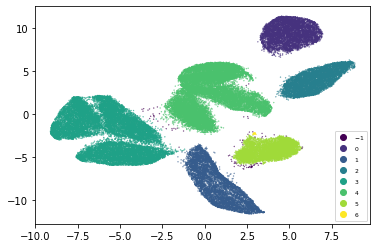

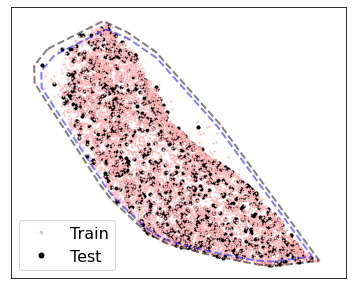

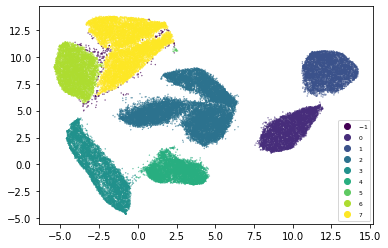

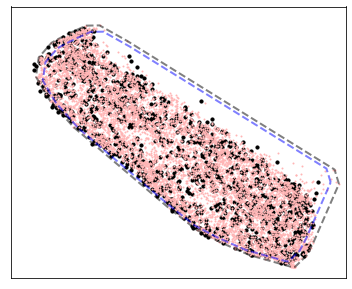

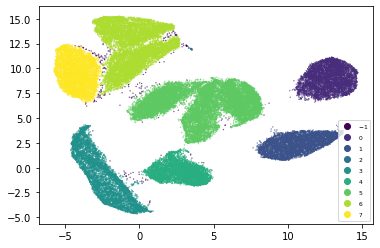

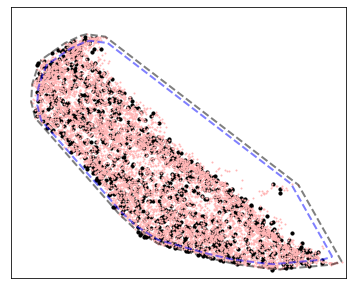

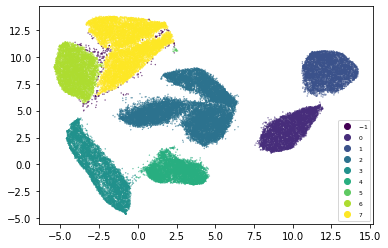

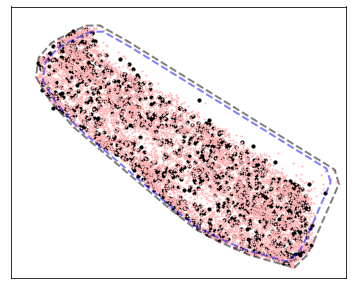

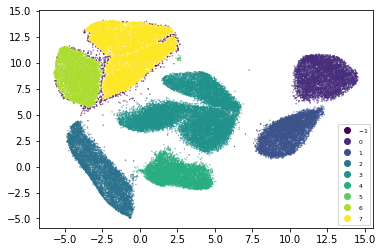

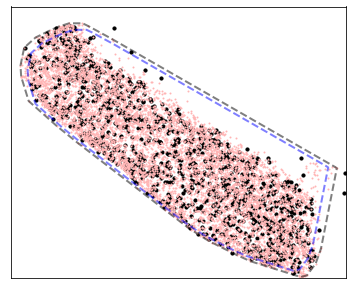

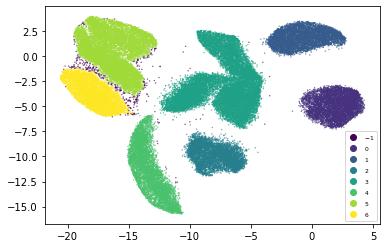

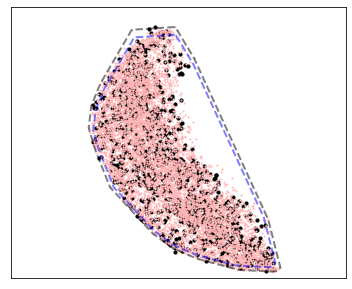

In [54]:
from matplotlib.lines import Line2D
test_label = 1

lp = 'k--'
lp2 = 'b--'

y_ump_all1_tr = y_ump_all[:X_train.shape[0]]#[y_train==test_label]
y_ump_all1_te = y_ump_all[X_train.shape[0]:]#[y_test==test_label]

c1 = 'k'#'r'
c2 = '#FFB5B5' #'#FF7070' #'#ABD190'#'blanchedalmond'

s1 = 10
s2 = 1

y_1 = y_train[y_1_idx]

print(y_ump_all1_tr.shape, y_1.shape)

plt.figure()
clusterer = hdbscan.HDBSCAN(min_cluster_size=15, prediction_data = True)
cluster_labels = clusterer.fit_predict(y_ump_all1_tr)
scatter = plt.scatter(y_ump_all1_tr[:,0], y_ump_all1_tr[:,1], c=cluster_labels, s=0.1)
lgd = plt.legend(*scatter.legend_elements(),
                    loc="lower right",
                    fontsize=12,
                prop={'size': 6})

plt.figure(figsize=[6,5])

Y_sub =  y_ump_all1_tr[cluster_labels==1]
cluster_labels_te, _ = hdbscan.approximate_predict(clusterer, y_ump_all1_te)
Y_sub_te = y_ump_all1_te[cluster_labels_te==1]

plt.scatter(Y_sub_te[:,0], Y_sub_te[:,1], c=c1, s=s1)
plt.scatter(Y_sub[:,0], Y_sub[:,1], c=c2, s=s2)

#plt.scatter(y_ump_all1_te[:,0], y_ump_all1_te[:,1], c=c1, s=s1)
#plt.scatter(y_ump_all1_tr[:,0], y_ump_all1_tr[:,1], c=c2, s=s2)

#Y_sub = y_ump_all1_tr[y_train==1]
Y_sub = y_ump_all1_tr[cluster_labels==1] #choose_Y(y_ump_all1_tr[y_train==1],x_lim=[-10,-4],y_lim=[-10,0])

hull = ConvexHull(Y_sub)
verts = hull.vertices
vert_points = Y_sub[verts]
verts = np.append( verts, hull.vertices[0] )
plt.plot(Y_sub[verts,0], Y_sub[verts,1], lp, lw=2, alpha=0.5)

scaled_verts = verts_points_inside(vert_points)
scaled_verts_plot = np.append(scaled_verts, scaled_verts[0]).reshape(scaled_verts.shape[0]+1,-1)

n1 = get_no_of_points_outside(Y_sub_te, vert_points)
n2 = get_no_of_points_outside(Y_sub_te, scaled_verts)
print('No of Points Outside (UMAP_ALL): ', n1, n2, n2-n1)    


plt.plot(scaled_verts_plot[:,0], scaled_verts_plot[:,1], lp2, lw=2, alpha=0.5)


#cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
#cbar.set_ticks(np.arange(10))
#cbar.set_ticklabels(classes)

#1
#plt.xlim([-7.5,0])
#plt.ylim([-4.5,5])

#plt.xlim([-2,4.0])
#plt.ylim([-12,-3])

plt.xlim([-2,4.0])
plt.ylim([-12,-3])

#4
#plt.xlim([-5,5])
#plt.ylim([10,15])


#6
#plt.xlim([8,12])
#plt.ylim([0,6])

#7
#plt.xlim([-6,0])
#plt.ylim([5,12])


plt.xticks([],[])
plt.yticks([],[])

legend_elements = [Line2D([0], [0], marker='.', markersize=5, lw=0, color=c2, label='Train'),
                   Line2D([0], [0], marker='.', markersize=10, lw=0, color=c1, label='Test')]


plt.legend([])
plt.legend(handles=legend_elements, loc= 'lower left', prop={'size': 16})


DPI = 400

plt.savefig('MNIST_FIGURES_Apr_30_2023/repulsion_all.png', bbox_inches='tight', dpi=DPI)

y_ump1_tr = y_umap#[y_train==test_label]
y_ump1_te = y_umap_test#[y_test==test_label]

plt.figure()
clusterer = hdbscan.HDBSCAN(min_cluster_size=15, prediction_data = True)
cluster_labels = clusterer.fit_predict(y_ump1_tr)
scatter = plt.scatter(y_ump1_tr[:,0], y_ump1_tr[:,1], c=cluster_labels, s=0.1)
lgd = plt.legend(*scatter.legend_elements(),
                    loc="lower right",
                    fontsize=12,
                prop={'size': 6})


plt.figure(figsize=[6,5])

Y_sub =  y_ump1_tr[cluster_labels==3]
cluster_labels_te, _ = hdbscan.approximate_predict(clusterer, y_ump1_te)
Y_sub_te = y_ump1_te[cluster_labels_te==3]

plt.scatter(Y_sub_te[:,0], Y_sub_te[:,1], c=c1, s=s1)
plt.scatter(Y_sub[:,0], Y_sub[:,1], c=c2, s=s2)

#plt.scatter(y_ump1_te[:,0], y_ump1_te[:,1], c=c1, s=s1)
#plt.scatter(y_ump1_tr[:,0], y_ump1_tr[:,1], c=c2, s=s2)

#Y_sub = y_ump1_tr[y_train==1]
Y_sub = y_ump1_tr[cluster_labels==3] # choose_Y(y_ump1_tr[y_train==1],x_lim=[-5,0],y_lim=[-5,5])

hull = ConvexHull(Y_sub)
verts = hull.vertices
vert_points = Y_sub[verts]
verts = np.append( verts, hull.vertices[0] )
plt.plot(Y_sub[verts,0], Y_sub[verts,1], lp, lw=2, alpha=0.5)

scaled_verts = verts_points_inside(vert_points)
scaled_verts_plot = np.append(scaled_verts, scaled_verts[0]).reshape(scaled_verts.shape[0]+1,-1)

n1 = get_no_of_points_outside(Y_sub_te, vert_points)
n2 = get_no_of_points_outside(Y_sub_te, scaled_verts)
print('No of Points Outside (UMAP_ns=5): ', n1, n2, n2-n1)    


plt.plot(scaled_verts_plot[:,0], scaled_verts_plot[:,1], lp2, lw=2, alpha=0.5)


plt.xlim([-5,0])
plt.ylim([-5,5])

plt.xticks([],[])
plt.yticks([],[])

plt.savefig('MNIST_FIGURES_Apr_30_2023/repulsion_umap.png', bbox_inches='tight', dpi=DPI)


y_ump1_tr = y_umap_15#[y_train==test_label]
y_ump1_te = y_umap_test_15#[y_test==test_label]

plt.figure()
clusterer = hdbscan.HDBSCAN(min_cluster_size=15, prediction_data = True)
cluster_labels = clusterer.fit_predict(y_ump1_tr)
scatter = plt.scatter(y_ump1_tr[:,0], y_ump1_tr[:,1], c=cluster_labels, s=0.1)
lgd = plt.legend(*scatter.legend_elements(),
                    loc="lower right",
                    fontsize=12,
                prop={'size': 6})

plt.figure(figsize=[6,5])

Y_sub =  y_ump1_tr[cluster_labels==3]
cluster_labels_te, _ = hdbscan.approximate_predict(clusterer, y_ump1_te)
Y_sub_te = y_ump1_te[cluster_labels_te==3]

plt.scatter(Y_sub_te[:,0], Y_sub_te[:,1], c=c1, s=s1)
plt.scatter(Y_sub[:,0], Y_sub[:,1], c=c2, s=s2)


#plt.scatter(y_ump1_te[:,0], y_ump1_te[:,1], c=c1, s=s1)
#plt.scatter(y_ump1_tr[:,0], y_ump1_tr[:,1], c=c2, s=s2)

#Y_sub = y_ump1_tr[y_train==1]
Y_sub = y_ump1_tr[cluster_labels==3] #choose_Y(y_ump1_tr[y_train==1],x_lim=[-5,1.0],y_lim=[-5,5.4])

hull = ConvexHull(Y_sub)
verts = hull.vertices
vert_points = Y_sub[verts]
verts = np.append( verts, hull.vertices[0] )
plt.plot(Y_sub[verts,0], Y_sub[verts,1], lp, lw=2, alpha=0.5)

scaled_verts = verts_points_inside(vert_points)
scaled_verts_plot = np.append(scaled_verts, scaled_verts[0]).reshape(scaled_verts.shape[0]+1,-1)

n1 = get_no_of_points_outside(Y_sub_te, vert_points)
n2 = get_no_of_points_outside(Y_sub_te, scaled_verts)
print('No of Points Outside (UMAP_15_neighbor): ', n1, n2, n2-n1)    

plt.plot(scaled_verts_plot[:,0], scaled_verts_plot[:,1], lp2, lw=2, alpha=0.5)


plt.xlim([-5,1.0])
plt.ylim([-5,5.4])

plt.xticks([],[])
plt.yticks([],[])

plt.savefig('MNIST_FIGURES_Apr_30_2023/repulsion_umap_15_neighbor.png', bbox_inches='tight', dpi=DPI)


y_ump1_tr = y_umap#[y_train==1]
y_ump1_te = y_test_ns_3#[y_test==1]

plt.figure()
clusterer = hdbscan.HDBSCAN(min_cluster_size=15, prediction_data = True)
cluster_labels = clusterer.fit_predict(y_ump1_tr)
scatter = plt.scatter(y_ump1_tr[:,0], y_ump1_tr[:,1], c=cluster_labels, s=0.1)
lgd = plt.legend(*scatter.legend_elements(),
                    loc="lower right",
                    fontsize=12,
                prop={'size': 6})

plt.figure(figsize=[6,5])

Y_sub =  y_ump1_tr[cluster_labels==3]
cluster_labels_te, _ = hdbscan.approximate_predict(clusterer, y_ump1_te)
Y_sub_te = y_ump1_te[cluster_labels_te==3]

plt.scatter(Y_sub_te[:,0], Y_sub_te[:,1], c=c1, s=s1)
plt.scatter(Y_sub[:,0], Y_sub[:,1], c=c2, s=s2)

#plt.scatter(y_ump1_te[:,0], y_ump1_te[:,1], c=c1, s=s1)
#plt.scatter(y_ump1_tr[:,0], y_ump1_tr[:,1], c=c2, s=s2)

#Y_sub = y_ump1_tr[y_train==1]
Y_sub = y_ump1_tr[cluster_labels==3] #choose_Y(y_ump1_tr[y_train==1],x_lim=[-5,0],y_lim=[-5,5])

hull = ConvexHull(Y_sub)
verts = hull.vertices
vert_points = Y_sub[verts]
verts = np.append( verts, hull.vertices[0] )
plt.plot(Y_sub[verts,0], Y_sub[verts,1], lp, lw=2, alpha=0.5)

scaled_verts = verts_points_inside(vert_points)
scaled_verts_plot = np.append(scaled_verts, scaled_verts[0]).reshape(scaled_verts.shape[0]+1,-1)

n1 = get_no_of_points_outside(Y_sub_te, vert_points)
n2 = get_no_of_points_outside(Y_sub_te, scaled_verts)
print('No of Points Outside (UMAP_ns=3): ', n1, n2, n2-n1)    


plt.plot(scaled_verts_plot[:,0], scaled_verts_plot[:,1], lp2, lw=2, alpha=0.5)


plt.xlim([-5,0])
plt.ylim([-5,5])
plt.xticks([],[])
plt.yticks([],[])

plt.savefig('MNIST_FIGURES_Apr_30_2023/repulsion_umap_ns_3.png', bbox_inches='tight',dpi=DPI)


#Y_test_MSECE



y_MSECE1_tr = Y_MSECE#[y_train==test_label]
y_MSECE1_te = Y_test_MSECE#[y_test==test_label]

plt.figure()
clusterer = hdbscan.HDBSCAN(min_cluster_size=15, prediction_data = True)
cluster_labels = clusterer.fit_predict(y_MSECE1_tr)
scatter = plt.scatter(y_MSECE1_tr[:,0], y_MSECE1_tr[:,1], c=cluster_labels, s=0.1)
lgd = plt.legend(*scatter.legend_elements(),
                    loc="lower right",
                    fontsize=12,
                prop={'size': 6})

plt.figure(figsize=[6,5])

Y_sub =  y_MSECE1_tr[cluster_labels==2]
cluster_labels_te, _ = hdbscan.approximate_predict(clusterer, y_MSECE1_te)
Y_sub_te = y_MSECE1_te[cluster_labels_te==2]

plt.scatter(Y_sub_te[:,0], Y_sub_te[:,1], c=c1, s=s1)
plt.scatter(Y_sub[:,0], Y_sub[:,1], c=c2, s=s2)

#plt.scatter(y_MSECE1_te[:,0], y_MSECE1_te[:,1], c=c1, s=s1)
#plt.scatter(y_MSECE1_tr[:,0], y_MSECE1_tr[:,1], c=c2, s=s2)

#Y_sub = y_MSECE1_tr[y_train==1]
Y_sub = y_MSECE1_tr[cluster_labels==2] #choose_Y(y_MSECE1_tr[y_train==1],x_lim=[-5,0],y_lim=[-5,5])

hull = ConvexHull(Y_sub)
verts = hull.vertices
vert_points = Y_sub[verts]
verts = np.append( verts, hull.vertices[0] )
plt.plot(Y_sub[verts,0], Y_sub[verts,1], lp, lw=2, alpha=0.5)

scaled_verts = verts_points_inside(vert_points)
scaled_verts_plot = np.append(scaled_verts, scaled_verts[0]).reshape(scaled_verts.shape[0]+1,-1)

n1 = get_no_of_points_outside(Y_sub_te, vert_points)
n2 = get_no_of_points_outside(Y_sub_te, scaled_verts)
print('No of Points Outside (UMAP_cemse): ', n1, n2, n2-n1)    

plt.plot(scaled_verts_plot[:,0], scaled_verts_plot[:,1], lp2, lw=2, alpha=0.5)


plt.xlim([-5,0])
plt.ylim([-5,5])

plt.xticks([],[])
plt.yticks([],[])

plt.savefig('MNIST_FIGURES_Apr_30_2023/repulsion_cemse.png', bbox_inches='tight',dpi=DPI)

y_1_tr = Y#[y_train==test_label]
y_1_te = Y_test#[y_test==test_label]

plt.figure()
clusterer = hdbscan.HDBSCAN(min_cluster_size=15, prediction_data = True)
cluster_labels = clusterer.fit_predict(y_1_tr)
scatter = plt.scatter(y_1_tr[:,0], y_1_tr[:,1], c=cluster_labels, s=0.1)
lgd = plt.legend(*scatter.legend_elements(),
                    loc="lower right",
                    fontsize=12,
                prop={'size': 6})

plt.figure(figsize=[6,5])

Y_sub =  y_1_tr[cluster_labels==4]
cluster_labels_te, _ = hdbscan.approximate_predict(clusterer, y_1_te)
Y_sub_te = y_1_te[cluster_labels_te==4]

plt.scatter(Y_sub_te[:,0], Y_sub_te[:,1], c=c1, s=s1)
plt.scatter(Y_sub[:,0], Y_sub[:,1], c=c2, s=s2)

#plt.scatter(y_1_te[:,0], y_1_te[:,1], c=c1, s=s1)
#plt.scatter(y_1_tr[:,0], y_1_tr[:,1], c=c2, s=s2)

print(y_1_tr.shape)

#Y_sub = y_1_tr[y_train==1]
Y_sub = y_1_tr[cluster_labels==4] #choose_Y(y_1_tr[y_train==1],x_lim=[-17,-9],y_lim=[-16,-5])

hull = ConvexHull(Y_sub)
verts = hull.vertices
vert_points = Y_sub[verts]
verts = np.append( verts, hull.vertices[0] )
plt.plot(Y_sub[verts,0], Y_sub[verts,1], lp, lw=2, alpha=0.5)

scaled_verts = verts_points_inside(vert_points)
scaled_verts_plot = np.append(scaled_verts, scaled_verts[0]).reshape(scaled_verts.shape[0]+1,-1)

n1 = get_no_of_points_outside(Y_sub_te, vert_points)
n2 = get_no_of_points_outside(Y_sub_te, scaled_verts)
print('No of Points Outside (UMAP_CE): ', n1, n2, n2-n1)    

plt.plot(scaled_verts_plot[:,0], scaled_verts_plot[:,1], lp2, lw=2, alpha=0.5)


plt.xlim([-17,-9])
plt.ylim([-16,-5])

plt.xticks([],[])
plt.yticks([],[])

plt.savefig('MNIST_FIGURES_Apr_30_2023/repulsion_ce.png', bbox_inches='tight', dpi=DPI)

(60000, 2) (6742,)
No of Points Outside (UMAP_ALL):  3 49 46
No of Points Outside (UMAP_ns=5):  17 104 87
No of Points Outside (UMAP_15_neighbor):  9 105 96
No of Points Outside (UMAP_ns=3):  3 75 72
No of Points Outside (UMAP_ns=1):  0 48 48
No of Points Outside (UMAP_mse):  6 53 47
No of Points Outside (UMAP_cemse):  4 46 42
(60000, 2)
No of Points Outside (UMAP_CE):  2 51 49


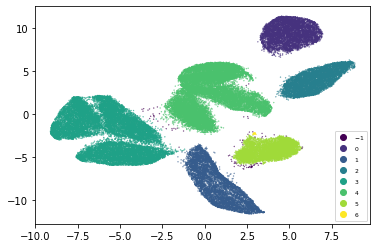

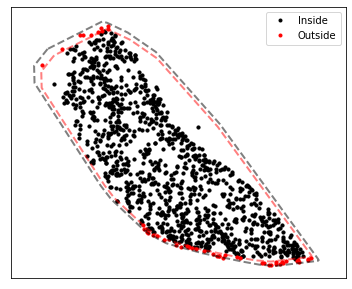

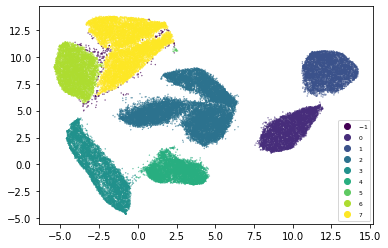

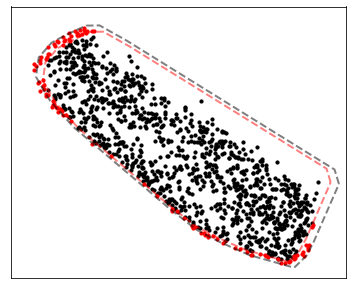

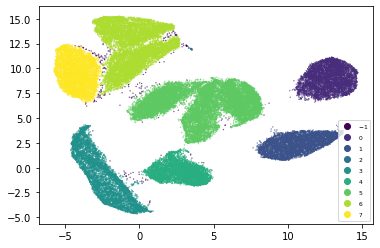

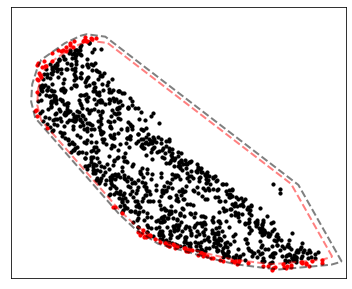

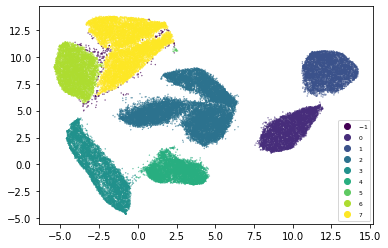

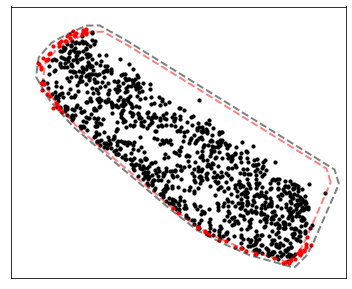

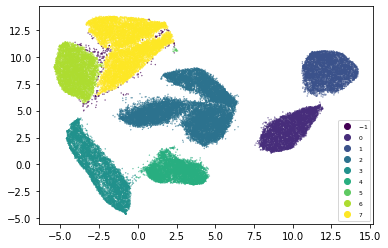

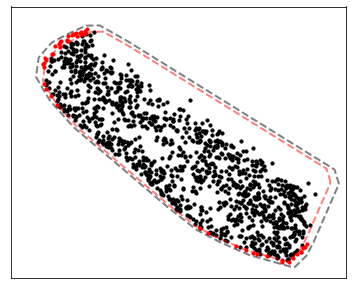

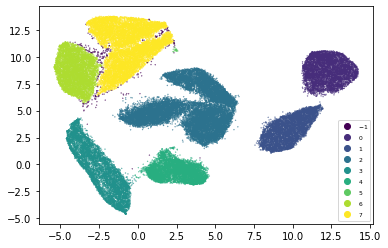

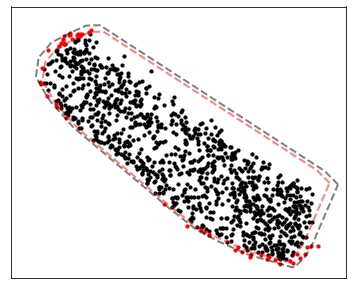

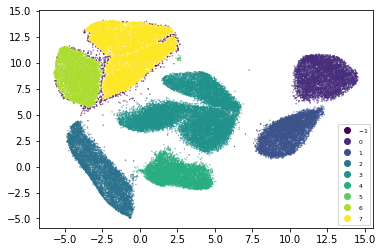

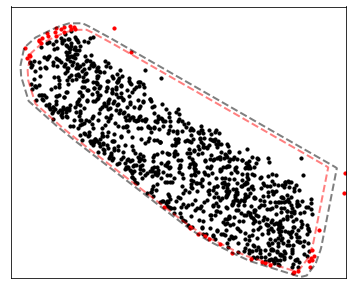

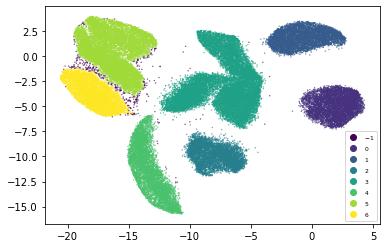

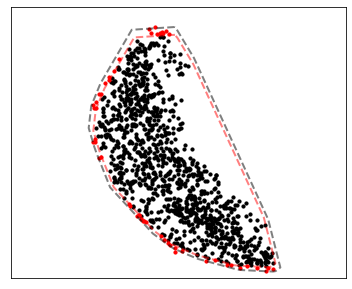

In [55]:
from matplotlib.lines import Line2D
test_label = 1

def get_no_of_points_outside(X, vert_points, verbose=False):
    no_out = 0
    y_labels = []
    for i in range(len(X)):
        y_in = is_inside(X[i], vert_points, verbose=False)
        no_out += 1-y_in
        y_labels.append(y_in)
    return no_out, np.array(y_labels)

lp = 'k--'
lp2 = 'r--'

y_ump_all1_tr = y_ump_all[:X_train.shape[0]]#[y_train==test_label]
y_ump_all1_te = y_ump_all[X_train.shape[0]:]#[y_test==test_label]

c1 = 'k'#'r'
c2 = 'r' #'#FF7070' #'#ABD190'#'blanchedalmond'

s1 = 10
s2 = 1

y_1 = y_train[y_1_idx]

print(y_ump_all1_tr.shape, y_1.shape)

plt.figure()
clusterer = hdbscan.HDBSCAN(min_cluster_size=15, prediction_data = True)
cluster_labels = clusterer.fit_predict(y_ump_all1_tr)
scatter = plt.scatter(y_ump_all1_tr[:,0], y_ump_all1_tr[:,1], c=cluster_labels, s=0.1)
lgd = plt.legend(*scatter.legend_elements(),
                    loc="lower right",
                    fontsize=12,
                prop={'size': 6})

plt.figure(figsize=[6,5])

Y_sub =  y_ump_all1_tr[cluster_labels==1]
cluster_labels_te, _ = hdbscan.approximate_predict(clusterer, y_ump_all1_te)
Y_sub_te = y_ump_all1_te[cluster_labels_te==1]


Y_sub = y_ump_all1_tr[cluster_labels==1] #choose_Y(y_ump_all1_tr[y_train==1],x_lim=[-10,-4],y_lim=[-10,0])

hull = ConvexHull(Y_sub)
verts = hull.vertices
vert_points = Y_sub[verts]
verts = np.append( verts, hull.vertices[0] )


scaled_verts = verts_points_inside(vert_points)
scaled_verts_plot = np.append(scaled_verts, scaled_verts[0]).reshape(scaled_verts.shape[0]+1,-1)

n1, _ = get_no_of_points_outside(Y_sub_te, vert_points)
n2, in_labels = get_no_of_points_outside(Y_sub_te, scaled_verts)
print('No of Points Outside (UMAP_ALL): ', n1, n2, n2-n1)    

plt.scatter(Y_sub_te[in_labels==1,0], Y_sub_te[in_labels==1,1], c=c1, s=s1)
plt.scatter(Y_sub_te[in_labels==0,0], Y_sub_te[in_labels==0,1], c=c2, s=s1)
plt.plot(Y_sub[verts,0], Y_sub[verts,1], lp, lw=2, alpha=0.5)
plt.plot(scaled_verts_plot[:,0], scaled_verts_plot[:,1], lp2, lw=2, alpha=0.5)

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='.', lw=0, color='k', label='Inside'),
                   Line2D([0], [0], marker='.', lw=0, color='r', label='Outside'),
                  ]
plt.legend(handles=legend_elements, loc='upper right')
#cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
#cbar.set_ticks(np.arange(10))
#cbar.set_ticklabels(classes)

#1
#plt.xlim([-7.5,0])
#plt.ylim([-4.5,5])

#plt.xlim([-2,4.0])
#plt.ylim([-12,-3])

plt.xlim([-2,4.0])
plt.ylim([-12,-3])

#4
#plt.xlim([-5,5])
#plt.ylim([10,15])


#6
#plt.xlim([8,12])
#plt.ylim([0,6])

#7
#plt.xlim([-6,0])
#plt.ylim([5,12])


plt.xticks([],[])
plt.yticks([],[])

legend_elements = [Line2D([0], [0], marker='.', markersize=5, lw=0, color=c2, label='Train'),
                   Line2D([0], [0], marker='.', markersize=10, lw=0, color=c1, label='Test')]


#plt.legend([])
#plt.legend(handles=legend_elements, loc= 'lower left', prop={'size': 16})


DPI = 400

plt.savefig('MNIST_FIGURES_Apr_30_2023/repulsion_all.png', bbox_inches='tight', dpi=DPI)

y_ump1_tr = y_umap#[y_train==test_label]
y_ump1_te = y_umap_test#[y_test==test_label]

plt.figure()
clusterer = hdbscan.HDBSCAN(min_cluster_size=15, prediction_data = True)
cluster_labels = clusterer.fit_predict(y_ump1_tr)
scatter = plt.scatter(y_ump1_tr[:,0], y_ump1_tr[:,1], c=cluster_labels, s=0.1)
lgd = plt.legend(*scatter.legend_elements(),
                    loc="lower right",
                    fontsize=12,
                prop={'size': 6})


plt.figure(figsize=[6,5])

Y_sub =  y_ump1_tr[cluster_labels==3]
cluster_labels_te, _ = hdbscan.approximate_predict(clusterer, y_ump1_te)
Y_sub_te = y_ump1_te[cluster_labels_te==3]


#plt.scatter(Y_sub[:,0], Y_sub[:,1], c=c2, s=s2)

#plt.scatter(y_ump1_te[:,0], y_ump1_te[:,1], c=c1, s=s1)
#plt.scatter(y_ump1_tr[:,0], y_ump1_tr[:,1], c=c2, s=s2)

#Y_sub = y_ump1_tr[y_train==1]
Y_sub = y_ump1_tr[cluster_labels==3] # choose_Y(y_ump1_tr[y_train==1],x_lim=[-5,0],y_lim=[-5,5])

hull = ConvexHull(Y_sub)
verts = hull.vertices
vert_points = Y_sub[verts]
verts = np.append( verts, hull.vertices[0] )


scaled_verts = verts_points_inside(vert_points)
scaled_verts_plot = np.append(scaled_verts, scaled_verts[0]).reshape(scaled_verts.shape[0]+1,-1)

n1, _ = get_no_of_points_outside(Y_sub_te, vert_points)
n2, in_labels = get_no_of_points_outside(Y_sub_te, scaled_verts)
print('No of Points Outside (UMAP_ns=5): ', n1, n2, n2-n1)    

plt.scatter(Y_sub_te[in_labels==1,0], Y_sub_te[in_labels==1,1], c=c1, s=s1)
plt.scatter(Y_sub_te[in_labels==0,0], Y_sub_te[in_labels==0,1], c=c2, s=s1)
plt.plot(Y_sub[verts,0], Y_sub[verts,1], lp, lw=2, alpha=0.5)
plt.plot(scaled_verts_plot[:,0], scaled_verts_plot[:,1], lp2, lw=2, alpha=0.5)


plt.xlim([-5,0])
plt.ylim([-5,5])

plt.xticks([],[])
plt.yticks([],[])

plt.savefig('MNIST_FIGURES_Apr_30_2023/repulsion_umap.png', bbox_inches='tight', dpi=DPI)


y_ump1_tr = y_umap_15#[y_train==test_label]
y_ump1_te = y_umap_test_15#[y_test==test_label]

plt.figure()
clusterer = hdbscan.HDBSCAN(min_cluster_size=15, prediction_data = True)
cluster_labels = clusterer.fit_predict(y_ump1_tr)
scatter = plt.scatter(y_ump1_tr[:,0], y_ump1_tr[:,1], c=cluster_labels, s=0.1)
lgd = plt.legend(*scatter.legend_elements(),
                    loc="lower right",
                    fontsize=12,
                prop={'size': 6})

plt.figure(figsize=[6,5])

Y_sub =  y_ump1_tr[cluster_labels==3]
cluster_labels_te, _ = hdbscan.approximate_predict(clusterer, y_ump1_te)
Y_sub_te = y_ump1_te[cluster_labels_te==3]


#plt.scatter(Y_sub[:,0], Y_sub[:,1], c=c2, s=s2)


#plt.scatter(y_ump1_te[:,0], y_ump1_te[:,1], c=c1, s=s1)
#plt.scatter(y_ump1_tr[:,0], y_ump1_tr[:,1], c=c2, s=s2)

#Y_sub = y_ump1_tr[y_train==1]
Y_sub = y_ump1_tr[cluster_labels==3] #choose_Y(y_ump1_tr[y_train==1],x_lim=[-5,1.0],y_lim=[-5,5.4])

hull = ConvexHull(Y_sub)
verts = hull.vertices
vert_points = Y_sub[verts]
verts = np.append( verts, hull.vertices[0] )


scaled_verts = verts_points_inside(vert_points)
scaled_verts_plot = np.append(scaled_verts, scaled_verts[0]).reshape(scaled_verts.shape[0]+1,-1)

n1, _ = get_no_of_points_outside(Y_sub_te, vert_points)
n2, in_labels = get_no_of_points_outside(Y_sub_te, scaled_verts)
print('No of Points Outside (UMAP_15_neighbor): ', n1, n2, n2-n1)    

plt.scatter(Y_sub_te[in_labels==1,0], Y_sub_te[in_labels==1,1], c=c1, s=s1)
plt.scatter(Y_sub_te[in_labels==0,0], Y_sub_te[in_labels==0,1], c=c2, s=s1)
plt.plot(Y_sub[verts,0], Y_sub[verts,1], lp, lw=2, alpha=0.5)
plt.plot(scaled_verts_plot[:,0], scaled_verts_plot[:,1], lp2, lw=2, alpha=0.5)


plt.xlim([-5,1.0])
plt.ylim([-5,5.4])

plt.xticks([],[])
plt.yticks([],[])

plt.savefig('MNIST_FIGURES_Apr_30_2023/repulsion_umap_15_neighbor.png', bbox_inches='tight', dpi=DPI)


y_ump1_tr = y_umap#[y_train==1]
y_ump1_te = y_test_ns_3#[y_test==1]

plt.figure()
clusterer = hdbscan.HDBSCAN(min_cluster_size=15, prediction_data = True)
cluster_labels = clusterer.fit_predict(y_ump1_tr)
scatter = plt.scatter(y_ump1_tr[:,0], y_ump1_tr[:,1], c=cluster_labels, s=0.1)
lgd = plt.legend(*scatter.legend_elements(),
                    loc="lower right",
                    fontsize=12,
                prop={'size': 6})

plt.figure(figsize=[6,5])

Y_sub =  y_ump1_tr[cluster_labels==3]
cluster_labels_te, _ = hdbscan.approximate_predict(clusterer, y_ump1_te)
Y_sub_te = y_ump1_te[cluster_labels_te==3]

#plt.scatter(Y_sub[:,0], Y_sub[:,1], c=c2, s=s2)

#plt.scatter(y_ump1_te[:,0], y_ump1_te[:,1], c=c1, s=s1)
#plt.scatter(y_ump1_tr[:,0], y_ump1_tr[:,1], c=c2, s=s2)

#Y_sub = y_ump1_tr[y_train==1]
Y_sub = y_ump1_tr[cluster_labels==3] #choose_Y(y_ump1_tr[y_train==1],x_lim=[-5,0],y_lim=[-5,5])

hull = ConvexHull(Y_sub)
verts = hull.vertices
vert_points = Y_sub[verts]
verts = np.append( verts, hull.vertices[0] )

scaled_verts = verts_points_inside(vert_points)
scaled_verts_plot = np.append(scaled_verts, scaled_verts[0]).reshape(scaled_verts.shape[0]+1,-1)

n1, _ = get_no_of_points_outside(Y_sub_te, vert_points)
n2, in_labels = get_no_of_points_outside(Y_sub_te, scaled_verts)
print('No of Points Outside (UMAP_ns=3): ', n1, n2, n2-n1)    

plt.scatter(Y_sub_te[in_labels==1,0], Y_sub_te[in_labels==1,1], c=c1, s=s1)
plt.scatter(Y_sub_te[in_labels==0,0], Y_sub_te[in_labels==0,1], c=c2, s=s1)
plt.plot(Y_sub[verts,0], Y_sub[verts,1], lp, lw=2, alpha=0.5)
plt.plot(scaled_verts_plot[:,0], scaled_verts_plot[:,1], lp2, lw=2, alpha=0.5)


plt.xlim([-5,0])
plt.ylim([-5,5])
plt.xticks([],[])
plt.yticks([],[])

plt.savefig('MNIST_FIGURES_Apr_30_2023/repulsion_umap_ns_3.png', bbox_inches='tight',dpi=DPI)


y_ump1_tr = y_umap#[y_train==1]
y_ump1_te = y_test_ns_1#[y_test==1]

plt.figure()
clusterer = hdbscan.HDBSCAN(min_cluster_size=15, prediction_data = True)
cluster_labels = clusterer.fit_predict(y_ump1_tr)
scatter = plt.scatter(y_ump1_tr[:,0], y_ump1_tr[:,1], c=cluster_labels, s=0.1)
lgd = plt.legend(*scatter.legend_elements(),
                    loc="lower right",
                    fontsize=12,
                prop={'size': 6})

plt.figure(figsize=[6,5])

Y_sub =  y_ump1_tr[cluster_labels==3]
cluster_labels_te, _ = hdbscan.approximate_predict(clusterer, y_ump1_te)
Y_sub_te = y_ump1_te[cluster_labels_te==3]

#plt.scatter(Y_sub[:,0], Y_sub[:,1], c=c2, s=s2)

#plt.scatter(y_ump1_te[:,0], y_ump1_te[:,1], c=c1, s=s1)
#plt.scatter(y_ump1_tr[:,0], y_ump1_tr[:,1], c=c2, s=s2)

#Y_sub = y_ump1_tr[y_train==1]
Y_sub = y_ump1_tr[cluster_labels==3] #choose_Y(y_ump1_tr[y_train==1],x_lim=[-5,0],y_lim=[-5,5])

hull = ConvexHull(Y_sub)
verts = hull.vertices
vert_points = Y_sub[verts]
verts = np.append( verts, hull.vertices[0] )

scaled_verts = verts_points_inside(vert_points)
scaled_verts_plot = np.append(scaled_verts, scaled_verts[0]).reshape(scaled_verts.shape[0]+1,-1)

n1, _ = get_no_of_points_outside(Y_sub_te, vert_points)
n2, in_labels = get_no_of_points_outside(Y_sub_te, scaled_verts)
print('No of Points Outside (UMAP_ns=1): ', n1, n2, n2-n1)    


plt.scatter(Y_sub_te[in_labels==1,0], Y_sub_te[in_labels==1,1], c=c1, s=s1)
plt.scatter(Y_sub_te[in_labels==0,0], Y_sub_te[in_labels==0,1], c=c2, s=s1)
plt.plot(Y_sub[verts,0], Y_sub[verts,1], lp, lw=2, alpha=0.5)
plt.plot(scaled_verts_plot[:,0], scaled_verts_plot[:,1], lp2, lw=2, alpha=0.5)


plt.xlim([-5,0])
plt.ylim([-5,5])
plt.xticks([],[])
plt.yticks([],[])

plt.savefig('MNIST_FIGURES_Apr_30_2023/repulsion_umap_ns_1.png', bbox_inches='tight',dpi=DPI)

#Y_test_MSECE

y_MSECE1_tr = Y_MSE#[y_train==test_label]
y_MSECE1_te = Y_test_MSE#[y_test==test_label]

plt.figure()
clusterer = hdbscan.HDBSCAN(min_cluster_size=15, prediction_data = True)
cluster_labels = clusterer.fit_predict(y_MSECE1_tr)
scatter = plt.scatter(y_MSECE1_tr[:,0], y_MSECE1_tr[:,1], c=cluster_labels, s=0.1)
lgd = plt.legend(*scatter.legend_elements(),
                    loc="lower right",
                    fontsize=12,
                prop={'size': 6})

plt.figure(figsize=[6,5])

Y_sub =  y_MSECE1_tr[cluster_labels==3]
cluster_labels_te, _ = hdbscan.approximate_predict(clusterer, y_MSECE1_te)
Y_sub_te = y_MSECE1_te[cluster_labels_te==3]

#plt.scatter(Y_sub[:,0], Y_sub[:,1], c=c2, s=s2)

#plt.scatter(y_MSECE1_te[:,0], y_MSECE1_te[:,1], c=c1, s=s1)
#plt.scatter(y_MSECE1_tr[:,0], y_MSECE1_tr[:,1], c=c2, s=s2)

#Y_sub = y_MSECE1_tr[y_train==1]
Y_sub = y_MSECE1_tr[cluster_labels==3] #choose_Y(y_MSECE1_tr[y_train==1],x_lim=[-5,0],y_lim=[-5,5])

hull = ConvexHull(Y_sub)
verts = hull.vertices
vert_points = Y_sub[verts]
verts = np.append( verts, hull.vertices[0] )

scaled_verts = verts_points_inside(vert_points)
scaled_verts_plot = np.append(scaled_verts, scaled_verts[0]).reshape(scaled_verts.shape[0]+1,-1)

n1, _ = get_no_of_points_outside(Y_sub_te, vert_points)
n2, in_labels = get_no_of_points_outside(Y_sub_te, scaled_verts)
print('No of Points Outside (UMAP_mse): ', n1, n2, n2-n1)    

plt.scatter(Y_sub_te[in_labels==1,0], Y_sub_te[in_labels==1,1], c=c1, s=s1)
plt.scatter(Y_sub_te[in_labels==0,0], Y_sub_te[in_labels==0,1], c=c2, s=s1)
plt.plot(Y_sub[verts,0], Y_sub[verts,1], lp, lw=2, alpha=0.5)
plt.plot(scaled_verts_plot[:,0], scaled_verts_plot[:,1], lp2, lw=2, alpha=0.5)


plt.xlim([-5,0])
plt.ylim([-5,5])

plt.xticks([],[])
plt.yticks([],[])

plt.savefig('MNIST_FIGURES_Apr_30_2023/repulsion_mse.png', bbox_inches='tight',dpi=DPI)

y_MSECE1_tr = Y_MSECE#[y_train==test_label]
y_MSECE1_te = Y_test_MSECE#[y_test==test_label]

plt.figure()
clusterer = hdbscan.HDBSCAN(min_cluster_size=15, prediction_data = True)
cluster_labels = clusterer.fit_predict(y_MSECE1_tr)
scatter = plt.scatter(y_MSECE1_tr[:,0], y_MSECE1_tr[:,1], c=cluster_labels, s=0.1)
lgd = plt.legend(*scatter.legend_elements(),
                    loc="lower right",
                    fontsize=12,
                prop={'size': 6})

plt.figure(figsize=[6,5])

Y_sub =  y_MSECE1_tr[cluster_labels==2]
cluster_labels_te, _ = hdbscan.approximate_predict(clusterer, y_MSECE1_te)
Y_sub_te = y_MSECE1_te[cluster_labels_te==2]

#plt.scatter(Y_sub[:,0], Y_sub[:,1], c=c2, s=s2)

#plt.scatter(y_MSECE1_te[:,0], y_MSECE1_te[:,1], c=c1, s=s1)
#plt.scatter(y_MSECE1_tr[:,0], y_MSECE1_tr[:,1], c=c2, s=s2)

#Y_sub = y_MSECE1_tr[y_train==1]
Y_sub = y_MSECE1_tr[cluster_labels==2] #choose_Y(y_MSECE1_tr[y_train==1],x_lim=[-5,0],y_lim=[-5,5])

hull = ConvexHull(Y_sub)
verts = hull.vertices
vert_points = Y_sub[verts]
verts = np.append( verts, hull.vertices[0] )

scaled_verts = verts_points_inside(vert_points)
scaled_verts_plot = np.append(scaled_verts, scaled_verts[0]).reshape(scaled_verts.shape[0]+1,-1)

n1, _ = get_no_of_points_outside(Y_sub_te, vert_points)
n2, in_labels = get_no_of_points_outside(Y_sub_te, scaled_verts)
print('No of Points Outside (UMAP_cemse): ', n1, n2, n2-n1)    

plt.scatter(Y_sub_te[in_labels==1,0], Y_sub_te[in_labels==1,1], c=c1, s=s1)
plt.scatter(Y_sub_te[in_labels==0,0], Y_sub_te[in_labels==0,1], c=c2, s=s1)
plt.plot(Y_sub[verts,0], Y_sub[verts,1], lp, lw=2, alpha=0.5)
plt.plot(scaled_verts_plot[:,0], scaled_verts_plot[:,1], lp2, lw=2, alpha=0.5)


plt.xlim([-5,0])
plt.ylim([-5,5])

plt.xticks([],[])
plt.yticks([],[])

plt.savefig('MNIST_FIGURES_Apr_30_2023/repulsion_cemse.png', bbox_inches='tight',dpi=DPI)

y_1_tr = Y#[y_train==test_label]
y_1_te = Y_test#[y_test==test_label]

plt.figure()
clusterer = hdbscan.HDBSCAN(min_cluster_size=15, prediction_data = True)
cluster_labels = clusterer.fit_predict(y_1_tr)
scatter = plt.scatter(y_1_tr[:,0], y_1_tr[:,1], c=cluster_labels, s=0.1)
lgd = plt.legend(*scatter.legend_elements(),
                    loc="lower right",
                    fontsize=12,
                prop={'size': 6})

plt.figure(figsize=[6,5])

Y_sub =  y_1_tr[cluster_labels==4]
cluster_labels_te, _ = hdbscan.approximate_predict(clusterer, y_1_te)
Y_sub_te = y_1_te[cluster_labels_te==4]

#plt.scatter(Y_sub[:,0], Y_sub[:,1], c=c2, s=s2)

#plt.scatter(y_1_te[:,0], y_1_te[:,1], c=c1, s=s1)
#plt.scatter(y_1_tr[:,0], y_1_tr[:,1], c=c2, s=s2)

print(y_1_tr.shape)

#Y_sub = y_1_tr[y_train==1]
Y_sub = y_1_tr[cluster_labels==4] #choose_Y(y_1_tr[y_train==1],x_lim=[-17,-9],y_lim=[-16,-5])

hull = ConvexHull(Y_sub)
verts = hull.vertices
vert_points = Y_sub[verts]
verts = np.append( verts, hull.vertices[0] )

scaled_verts = verts_points_inside(vert_points)
scaled_verts_plot = np.append(scaled_verts, scaled_verts[0]).reshape(scaled_verts.shape[0]+1,-1)

n1, _ = get_no_of_points_outside(Y_sub_te, vert_points)
n2, in_labels = get_no_of_points_outside(Y_sub_te, scaled_verts)
print('No of Points Outside (UMAP_CE): ', n1, n2, n2-n1)    

plt.scatter(Y_sub_te[in_labels==1,0], Y_sub_te[in_labels==1,1], c=c1, s=s1)
plt.scatter(Y_sub_te[in_labels==0,0], Y_sub_te[in_labels==0,1], c=c2, s=s1)
plt.plot(Y_sub[verts,0], Y_sub[verts,1], lp, lw=2, alpha=0.5)
plt.plot(scaled_verts_plot[:,0], scaled_verts_plot[:,1], lp2, lw=2, alpha=0.5)


plt.xlim([-17,-9])
plt.ylim([-16,-5])

plt.xticks([],[])
plt.yticks([],[])

plt.savefig('MNIST_FIGURES_Apr_30_2023/repulsion_ce.png', bbox_inches='tight', dpi=DPI)

No of Points Outside (UMAP_mse):  6 53 47


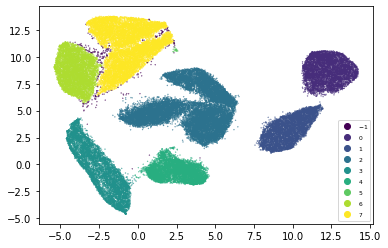

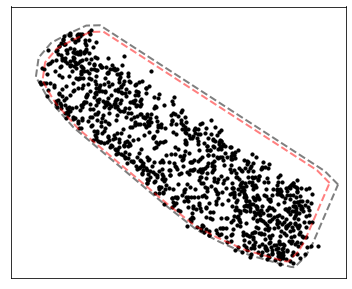

In [57]:
y_MSECE1_tr = Y_MSE#[y_train==test_label]
y_MSECE1_te = Y_test_MSE#[y_test==test_label]

plt.figure()
clusterer = hdbscan.HDBSCAN(min_cluster_size=15, prediction_data = True)
cluster_labels = clusterer.fit_predict(y_MSECE1_tr)
scatter = plt.scatter(y_MSECE1_tr[:,0], y_MSECE1_tr[:,1], c=cluster_labels, s=0.1)
lgd = plt.legend(*scatter.legend_elements(),
                    loc="lower right",
                    fontsize=12,
                prop={'size': 6})

plt.figure(figsize=[6,5])

Y_sub =  y_MSECE1_tr[cluster_labels==3]
cluster_labels_te, _ = hdbscan.approximate_predict(clusterer, y_MSECE1_te)
Y_sub_te = y_MSECE1_te[cluster_labels_te==3]

plt.scatter(Y_sub_te[:,0], Y_sub_te[:,1], c=c1, s=s1)

Y_sub = y_MSECE1_tr[cluster_labels==3]

hull = ConvexHull(Y_sub)
verts = hull.vertices
vert_points = Y_sub[verts]
verts = np.append( verts, hull.vertices[0] )
plt.plot(Y_sub[verts,0], Y_sub[verts,1], lp, lw=2, alpha=0.5)

scaled_verts = verts_points_inside(vert_points)
scaled_verts_plot = np.append(scaled_verts, scaled_verts[0]).reshape(scaled_verts.shape[0]+1,-1)

n1,_ = get_no_of_points_outside(Y_sub_te, vert_points)
n2,_ = get_no_of_points_outside(Y_sub_te, scaled_verts)
print('No of Points Outside (UMAP_mse): ', n1, n2, n2-n1)    

plt.plot(scaled_verts_plot[:,0], scaled_verts_plot[:,1], lp2, lw=2, alpha=0.5)


plt.xlim([-5,0])
plt.ylim([-5,5])

plt.xticks([],[])
plt.yticks([],[])

plt.savefig('MNIST_FIGURES_Apr_30_2023/repulsion_mse.png', bbox_inches='tight',dpi=DPI)

<h1>Compute Trustworthiness</h1>

In [58]:
import numba
from numba import prange

@numba.jit(nopython=True, parallel=True)
def get_first_order_graph(X,n_neighbors):
    
    N = X.shape[0]
    
    dist = np.zeros((N, N), dtype=np.float32)
    #euclidean_distances(X_train, squared = False)

    sort_idx = np.zeros((N,n_neighbors), dtype=np.int32)
    
    for i in range(N):
        if (i+1)%10000 == 0:
            print('Completed ', i+1, ' of ', N)
        
        for j in prange(i+1,N):
            dist[i,j] = np.sum( (X[i]-X[j])**2 )
            dist[j,i] = dist[i,j]
        
        sort_idx[i,:] = np.argsort(dist[i,:])[1:n_neighbors+1]
    
    return sort_idx, dist

@numba.jit(nopython=True, parallel=True)
def my_neiberhood_preservation(Y,sort_idx):
    N = Y.shape[0]
    K = sort_idx.shape[1]

    val = 0.0
    for i in prange(N):
        dist = np.sum((Y - Y[i,:])**2,axis=1)
        
        sort_idy = np.argsort(dist)[1:]
        for j in prange(K):
            r_0 = np.argwhere(sort_idy==sort_idx[i,j])
            r = r_0[0,0] 
            r_v = r - K 
            if r_v>0:
                val += r_v
    
    val = val * 2 / ( N*K * (2*N - 3*K - 1))
    
    return 1 - val

@numba.jit(nopython=True, parallel=True)
def my_trustworthiness(Y,sort_idx,K):
    N = Y.shape[0]

    val = 0.0
    for i in prange(N):
        dist = np.sum((Y - Y[i,:])**2,axis=1)
        
        #print(dist.shape)
        
        sort_idy = np.argsort(dist)[1:]
        for j in prange(K):
            r_0 = np.argwhere(sort_idy[j]==sort_idx[i,:])
            r = r_0[0,0] 
            r_v = r - K + 1
            if r_v>0:
                val += r_v
    val = val * 2.0 / ( N*K * (2*N - 3*K - 1.0))
    
    return 1 - val


In [59]:
X_all = np.concatenate((X_train,X_test), axis=0)

sort_idx,_ = get_first_order_graph(X_all,n_neighbors=X_all.shape[0]-1)

Completed  10000  of  70000
Completed  20000  of  70000
Completed  30000  of  70000
Completed  40000  of  70000
Completed  50000  of  70000
Completed  60000  of  70000
Completed  70000  of  70000


In [60]:
import gc
gc.collect()


48396

In [61]:
import gc

pca_all = np.concatenate((y_pca, y_pca_test))
y_all_umap = np.concatenate((y_umap,y_umap_test))
y_all_umap_ns3 = np.concatenate((y_umap,y_test_ns_3))
y_all_umap_ns1 = np.concatenate((y_umap,y_test_ns_1))
y_all_umap_all = np.concatenate((y_ump_all_tr,y_ump_all_te)) 
y_all_mse = np.concatenate((Y_MSE,Y_test_MSE))
y_all_cemse = np.concatenate((Y_MSECE,Y_test_MSECE))
y_all_ce = np.concatenate((Y,Y_test))

n_neighbors = 5
print('ALL Trustworthiness: n_neighbors = ', n_neighbors)

gc.collect()
trt_umap = my_trustworthiness(y_all_umap, sort_idx, K=n_neighbors)
print('UMAP:',trt_umap)

gc.collect()
trt_umap_ns3 = my_trustworthiness(y_all_umap_ns3, sort_idx, K=n_neighbors)
print('UMAP ns=3:',trt_umap_ns3)

gc.collect()
trt_umap_ns1 = my_trustworthiness(y_all_umap_ns1, sort_idx, K=n_neighbors)
print('UMAP ns=1:',trt_umap_ns1)

gc.collect()
trt_umap_all = my_trustworthiness(y_all_umap_all, sort_idx, K=n_neighbors)
print('UMAP all:',trt_umap_all)

gc.collect()
trt_mse = my_trustworthiness(y_all_mse, sort_idx, K=n_neighbors)
print('MSE:',trt_mse)

gc.collect()
trt_cemse = my_trustworthiness(y_all_cemse, sort_idx, K=n_neighbors)
print('CEMSE:',trt_cemse)

gc.collect()
trt_ce = my_trustworthiness(y_all_ce, sort_idx, K=n_neighbors)
print('CE:', trt_ce)


gc.collect()
trt_pca = my_trustworthiness(pca_all, sort_idx, K=n_neighbors)
print('PCA:', trt_pca)

ALL Trustworthiness: n_neighbors =  5
UMAP: 0.952328946777591
UMAP ns=3: 0.9523432773949676
UMAP ns=1: 0.9523049324412586
UMAP all: 0.9541607989484513
MSE: 0.9467297925477197
CEMSE: 0.9538343552324348
CE: 0.9547106154580932
PCA: 0.735058225674771


In [62]:
n_neighbors = 30
print('ALL Trustworthiness: n_neighbors = ', n_neighbors)

gc.collect()
trt_umap = my_trustworthiness(y_all_umap, sort_idx, K=n_neighbors)
print('UMAP:',trt_umap)

gc.collect()
trt_umap_ns3 = my_trustworthiness(y_all_umap_ns3, sort_idx, K=n_neighbors)
print('UMAP ns=3:',trt_umap_ns3)

gc.collect()
trt_umap_ns1 = my_trustworthiness(y_all_umap_ns1, sort_idx, K=n_neighbors)
print('UMAP ns=1:',trt_umap_ns1)

gc.collect()
trt_umap_all = my_trustworthiness(y_all_umap_all, sort_idx, K=n_neighbors)
print('UMAP all:',trt_umap_all)

gc.collect()
trt_mse = my_trustworthiness(y_all_mse, sort_idx, K=n_neighbors)
print('MSE:',trt_mse)

gc.collect()
trt_cemse = my_trustworthiness(y_all_cemse, sort_idx, K=n_neighbors)
print('CEMSE:',trt_cemse)

gc.collect()
trt_ce = my_trustworthiness(y_all_ce, sort_idx, K=n_neighbors)
print('CE:', trt_ce)

gc.collect()
trt_pca = my_trustworthiness(pca_all, sort_idx, K=n_neighbors)
print('PCA:', trt_pca)

ALL Trustworthiness: n_neighbors =  30
UMAP: 0.9518762384189179
UMAP ns=3: 0.9518759286597512
UMAP ns=1: 0.9517970689587688
UMAP all: 0.9533022954784556
MSE: 0.9467222171826654
CEMSE: 0.9533904242451471
CE: 0.9545809525443238
PCA: 0.7350403873061708


In [63]:
n_neighbors = 100
print('ALL Trustworthiness: n_neighbors = ', n_neighbors)

gc.collect()
trt_umap = my_trustworthiness(y_all_umap, sort_idx, K=n_neighbors)

print('UMAP:',trt_umap)
gc.collect()

gc.collect()
trt_umap_ns3 = my_trustworthiness(y_all_umap_ns3, sort_idx, K=n_neighbors)
print('UMAP ns=3:',trt_umap_ns3)

gc.collect()
trt_umap_ns1 = my_trustworthiness(y_all_umap_ns1, sort_idx, K=n_neighbors)
print('UMAP ns=1:',trt_umap_ns1)

gc.collect()
trt_umap_all = my_trustworthiness(y_all_umap_all, sort_idx, K=n_neighbors)
print('UMAP all:',trt_umap_all)

trt_mse = my_trustworthiness(y_all_mse, sort_idx, K=n_neighbors)
print('MSE:',trt_mse)

gc.collect()
trt_cemse = my_trustworthiness(y_all_cemse, sort_idx, K=n_neighbors)
print('CEMSE:',trt_cemse)

gc.collect()
trt_ce = my_trustworthiness(y_all_ce, sort_idx, K=n_neighbors)
print('CE:', trt_ce)

gc.collect()
trt_pca = my_trustworthiness(pca_all, sort_idx, K=n_neighbors)
print('PCA:', trt_pca)

ALL Trustworthiness: n_neighbors =  100
UMAP: 0.9505712299464256
UMAP ns=3: 0.9505317823729181
UMAP ns=1: 0.9504848631189711
UMAP all: 0.9520977969798332
MSE: 0.9456056850105278
CEMSE: 0.9523481495848728
CE: 0.9538343072422034
PCA: 0.735330624649118


In [64]:
sort_idx_train,_ = get_first_order_graph(X_train, n_neighbors=X_train.shape[0]-1)

Completed  10000  of  60000
Completed  20000  of  60000
Completed  30000  of  60000
Completed  40000  of  60000
Completed  50000  of  60000
Completed  60000  of  60000


In [65]:
n_neighbors = 5
print('Training Trustworthiness: n_neighbors = ', n_neighbors)

gc.collect()
trt_umap = my_trustworthiness(y_umap, sort_idx_train, K=n_neighbors)
print('UMAP:',trt_umap)

gc.collect()
trt_umap_all = my_trustworthiness(y_all_umap_all[:X_train.shape[0],:], sort_idx_train, K=n_neighbors)
print('UMAP all:',trt_umap_all)


gc.collect()
trt_mse = my_trustworthiness(Y_MSE, sort_idx_train, K=n_neighbors)
print('MSE:',trt_mse)

gc.collect()
trt_cemse = my_trustworthiness(Y_MSECE, sort_idx_train, K=n_neighbors)
print('CEMSE:',trt_cemse)

gc.collect()
trt_ce = my_trustworthiness(Y, sort_idx_train, K=n_neighbors)
print('CE:', trt_ce)

gc.collect()
trt_pca = my_trustworthiness(y_pca, sort_idx_train, K=n_neighbors)
print('PCA:', trt_pca)



Training Trustworthiness: n_neighbors =  5
UMAP: 0.952319947604125
UMAP all: 0.9537154212783927
MSE: 0.9523202178068186
CEMSE: 0.9549686754900654
CE: 0.9555084308463351
PCA: 0.7338925652309196


In [66]:
n_neighbors = 30
print('Training Trustworthiness: n_neighbors = ', n_neighbors)

gc.collect()
trt_umap = my_trustworthiness(y_umap, sort_idx_train, K=n_neighbors)
print('UMAP:',trt_umap)

gc.collect()
trt_umap_all = my_trustworthiness(y_all_umap_all[:X_train.shape[0],:], sort_idx_train, K=n_neighbors)
print('UMAP all:',trt_umap_all)


gc.collect()
trt_mse = my_trustworthiness(Y_MSE, sort_idx_train, K=n_neighbors)
print('MSE:',trt_mse)

gc.collect()
trt_cemse = my_trustworthiness(Y_MSECE, sort_idx_train, K=n_neighbors)
print('CEMSE:',trt_cemse)

gc.collect()
trt_ce = my_trustworthiness(Y, sort_idx_train, K=n_neighbors)
print('CE:', trt_ce)

gc.collect()
trt_pca = my_trustworthiness(y_pca, sort_idx_train, K=n_neighbors)
print('PCA:', trt_pca)



Training Trustworthiness: n_neighbors =  30
UMAP: 0.9517932037999186
UMAP all: 0.95309965757366
MSE: 0.9517222467871469
CEMSE: 0.9544047264545984
CE: 0.9552803040361163
PCA: 0.7339767746466996


In [67]:
n_neighbors = 100
print('Training Trustworthiness: n_neighbors = ', n_neighbors)

gc.collect()
trt_umap = my_trustworthiness(y_umap, sort_idx_train, K=n_neighbors)
print('UMAP:',trt_umap)

gc.collect()
trt_umap_all = my_trustworthiness(y_all_umap_all[:X_train.shape[0],:], sort_idx_train, K=n_neighbors)
print('UMAP all:',trt_umap_all)


gc.collect()
trt_mse = my_trustworthiness(Y_MSE, sort_idx_train, K=n_neighbors)
print('MSE:',trt_mse)

gc.collect()
trt_cemse = my_trustworthiness(Y_MSECE, sort_idx_train, K=n_neighbors)
print('CEMSE:',trt_cemse)

gc.collect()
trt_ce = my_trustworthiness(Y, sort_idx_train, K=n_neighbors)
print('CE:', trt_ce)


gc.collect()
trt_pca = my_trustworthiness(y_pca, sort_idx_train, K=n_neighbors)
print('PCA:', trt_pca)



Training Trustworthiness: n_neighbors =  100
UMAP: 0.9501387312202553
UMAP all: 0.9516560861076534
MSE: 0.9501218043147116
CEMSE: 0.953097679276073
CE: 0.9543058635800354
PCA: 0.734177939467609


In [69]:
#X_all = np.concatenate((X_train,X_test), axis=0)

print('Compare 10K points (to match with Sainberg paper):')

N_Comp = 10000

sort_idx,_ = get_first_order_graph(X_train[:N_Comp], n_neighbors=N_Comp-1)

n_neighbors = 5

print('Trustworthiness 10K:')
gc.collect()
trt_umap = my_trustworthiness(y_umap[:N_Comp], sort_idx, K=n_neighbors)

print(trt_umap)

gc.collect()
trt_mse = my_trustworthiness(Y_MSE[:N_Comp], sort_idx, K=n_neighbors)
print(trt_mse)

gc.collect()
trt_cemse = my_trustworthiness(Y_MSECE[:N_Comp], sort_idx, K=n_neighbors)
print(trt_cemse)

gc.collect()
trt_ce = my_trustworthiness(Y[:N_Comp], sort_idx, K=n_neighbors)
print(trt_ce)


Compare 10K points (to match with Sainberg paper):
Completed  10000  of  10000
Trustworthiness 10K:
0.9532121597277823
0.9530914151321057
0.9560664931945556
0.9559837670136109


In [ ]:
#